# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 8

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 35 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  40 баллов
* Задача 4 &mdash;  15 баллов




-----

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

#### <b><font color="blue">Легкая часть</font></b>
### Задача 1

В данной задаче мы продолжим работать с датасетом о диабете, с которым вы познакомились на занятии.

In [ ]:
data = load_diabetes()
X, y = data['data'], data['target']

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)



Реализуйте линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [ ]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """

    def __init__(self):
        pass

    def fit(self, X, Y):
        """
        Функция обучения модели.

        Предполагается модель Y = X * theta + epsilon.
        где X --- регрессор (матрица размера n x d),
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """

        self.n, self.d = X.shape

        self.theta = np.linalg.inv(X.T @ X) @ X.T @ Y

        return self


    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X
        и опционально доверительный/предсказательный интервал.

        X --- матрица объектов размера n x d

        """


        return X @ self.theta

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

In [ ]:
model1 = MyLinearRegression()
model1.fit(X_train, y_train)

print(model1.theta)

model2 = LinearRegression(fit_intercept=True)
model2.fit(X_train,y_train)

print(model2.coef_)

[ 125.21029469 -258.20102769  627.48724557  346.3131022  -803.34876809
  312.91593062   45.12316433  211.9889459   700.88175104  144.68714213]
[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


Теперь обучите модель без свободного члена.

In [ ]:
X_new = np.hstack((np.ones(X.shape[0])[:, np.newaxis],X))
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=42)

model3 = MyLinearRegression()
model3.fit(X_train, y_train)
print(model3.theta)

model2 = LinearRegression(fit_intercept=True)
model2.fit(X_train,y_train)
print(model2.coef_)

[ 151.34560454   37.90402135 -241.96436231  542.42875852  347.70384391
 -931.48884588  518.06227698  163.41998299  275.31790158  736.1988589
   48.67065743]
[   0.           37.90402135 -241.96436231  542.42875852  347.70384391
 -931.48884588  518.06227698  163.41998299  275.31790158  736.1988589
   48.67065743]


Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [ ]:
y_pred1 = model3.predict(X_test)
print(y_pred1)

[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.21436188 145.95665512  79.86703276
 157.369412

In [ ]:
y_pred2 = model1.predict(X_test)
y_pred2

array([ -23.37341591,   41.417742  ,  -20.86187342,  155.51382413,
        -37.09860905,  -73.12058904,  118.91827764,   27.76947564,
        -74.20289398,  -53.70857938,  -73.30951477,   15.77277713,
       -107.94634441,   65.47378318,  -50.35586475,  -12.57818465,
         84.28228271,  114.03820517,   61.53301419,   75.32035771,
         58.80782947,  -74.90425995,  -88.82110714,   45.86161247,
          2.98586463,   16.31520959,   43.90325637,   32.79145314,
       -115.79483581,  -46.19369733,   33.05149322,  -81.53290471,
        -17.57148352,   39.11503524,   30.51831943,   29.40729742,
        -27.23475803,  -37.52605456,    3.08435693, -103.69894748,
        -83.00066289,  -41.59923565,   17.86024924,   11.52732183,
         23.01599068, -107.40710082,  -86.47090653,  -32.72101379,
       -108.74834909,    7.77902156,   14.78224344, -107.55161619,
        -54.12814603,  -42.89479088,   -0.93248376,    3.35843898,
        -67.39665714,   71.49274663,  -39.18529678,  -79.02597

Сделайте выводы.

**Вывод:** Cвободный член сильно влияет на качество моделей


### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [ ]:
def calculate_coef(model, X, y, log_min, log_max,
               num):
    """Данная функция считает коэффициенты для признаков
    при различных значениях параметра регуляризации.
    """

    alphas = np.logspace(log_min, log_max, num)
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20])
    return coefs

def draw_track(coefs, log_min, log_max,
               num, title='', figsize=(12, 6)):

    """Данная функция строит график зависимости значений
    коэффициентов модели от параметра регуляризации.
    """

    alphas = np.logspace(log_min, log_max, num)

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1

    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### **Профиль физика и профиль химия**

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице (сокращенный вид), которые действуют как молекулярные признаки. 300-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа (этот столбец для обучения не нужен). 301-й столбец — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso, этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['physics_data.csv']))
data.head()

data

Saving physics_data.csv to physics_data (2).csv


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,-92.990624,-37.989869,-41.713767,2.459257,-18.563966,12.633696,10.269036,7.093498,11.729846,...,-0.000781,-0.002851,-0.006694,-0.001080,0.003278,0.011115,0.005822,0.005368,27535,-9.593441
496,496,-33.853515,35.368724,13.274417,25.765836,16.590896,-13.918333,16.788150,-14.716585,3.238425,...,-0.003979,0.009309,0.003323,-0.009299,0.000988,-0.010954,-0.003540,-0.001859,27536,-11.076878
497,497,-38.655242,11.967915,-12.953299,12.041033,26.324118,4.377067,-5.507208,-15.101374,-4.403972,...,-0.008269,-0.003215,0.005450,0.003140,-0.000292,0.001727,0.014564,0.009907,27538,-9.005514
498,498,-46.056230,18.084091,39.077455,-14.063225,0.243868,-21.583486,8.959267,17.277933,-3.917826,...,0.013263,-0.013744,-0.013583,-0.012581,0.009365,0.000493,0.003530,0.002471,27541,-14.458023


Разделите данные на признаки $X$ и целевые переменные $y$.

In [ ]:
X , y = data.iloc[:, :-2].to_numpy(), data['Eat']

X

array([[ 0.00000000e+00, -5.48250750e+01, -8.35718578e-01, ...,
         1.18049148e-02, -3.62149676e-02,  5.21803580e-02],
       [ 1.00000000e+00, -3.40398324e+01,  2.49307029e+01, ...,
         4.37719279e-03,  4.02296425e-03,  3.35555229e-03],
       [ 2.00000000e+00, -5.87942578e+01, -4.98234479e+01, ...,
         1.27956759e-02,  2.22696075e-02,  8.05056223e-03],
       ...,
       [ 4.97000000e+02, -3.86552416e+01,  1.19679153e+01, ...,
         1.72682596e-03,  1.45641823e-02,  9.90689733e-03],
       [ 4.98000000e+02, -4.60562297e+01,  1.80840907e+01, ...,
         4.93122676e-04,  3.52977286e-03,  2.47137275e-03],
       [ 4.99000000e+02, -4.56431367e+01,  2.27302557e+01, ...,
        -3.61789422e-02, -5.10955753e-02, -1.54064372e-02]])

Разделите выборку в отношении 7:3. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size=0.7 ,random_state=42)


Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** Эффективность методов падает, если признаки несбалансированных признаках


Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать **оптимальные** параметры регуляризации.

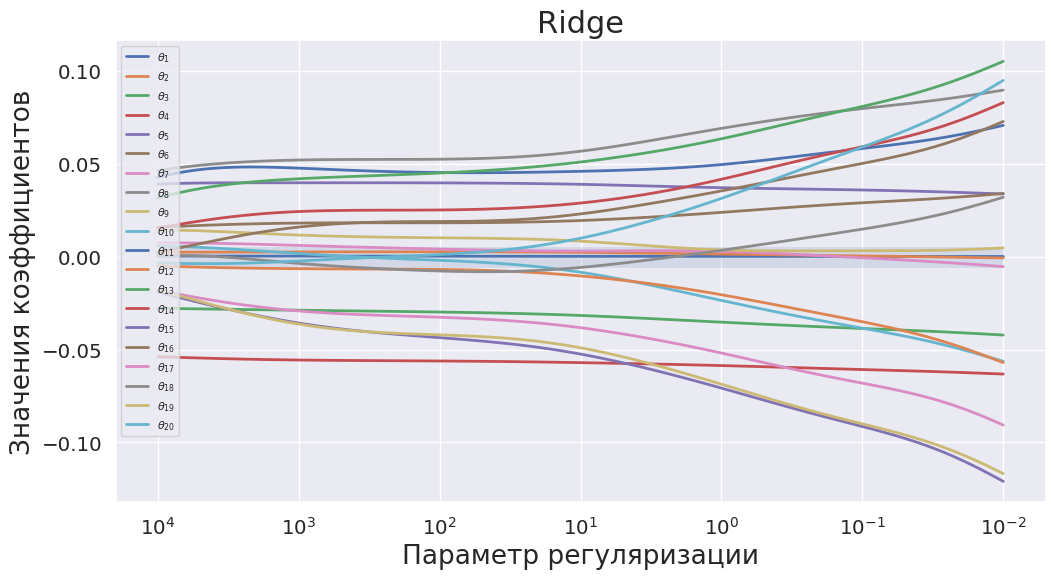

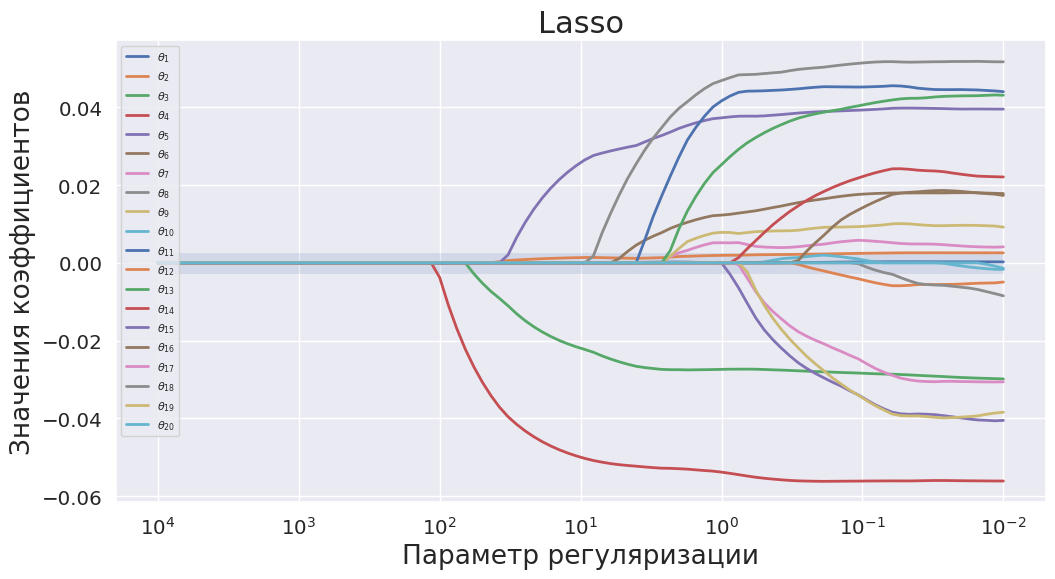

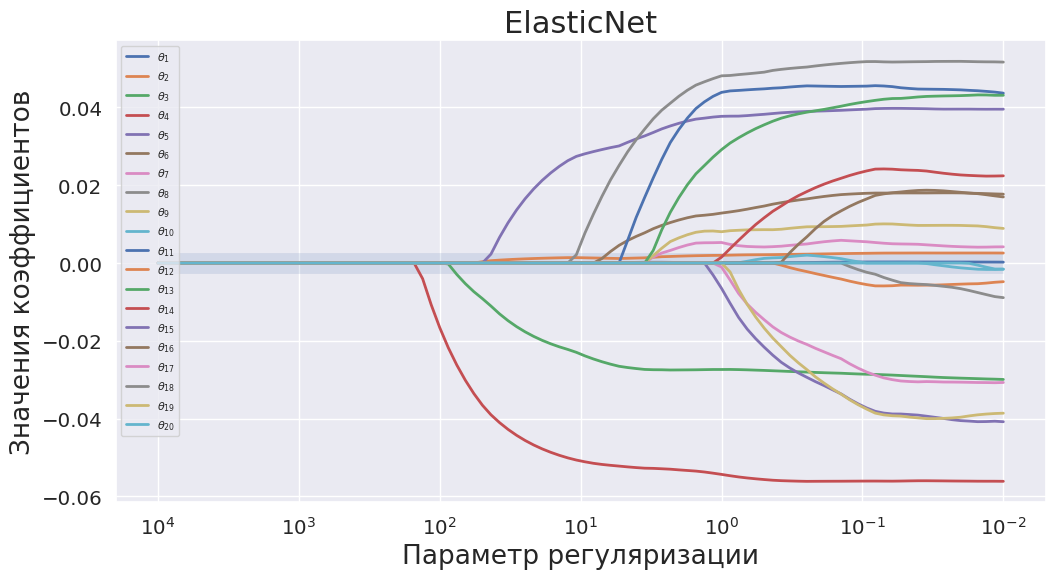

In [ ]:
models =[Ridge(), Lasso(), ElasticNet()]
modelName = ['Ridge', 'Lasso', 'ElasticNet']
for i in range(3):
  draw_track(calculate_coef(models[i], X, y, -2, 4, 100 ), -2, 4, 100, title = modelName[i], figsize=(12, 6))

**Ответ:** Стоит искать где коэффициенты имеют найбольшую стабильность. Для ElasticNet,Lasso - [10^2 до +inf]
Для Ridge - все печально, от 10^4 становится лучше

#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета.

In [ ]:
def calculate_coef(model, X, y, log_min, log_max, num):
    alphas = np.logspace(log_min, log_max, num)
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)
    return coefs

def draw_track(coefs, log_min, log_max, num, title='', figsize=(12, 6)):
    alphas = np.logspace(log_min, log_max, num)
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, alpha=0.15)
    for i in range(coefs.shape[1]):
        ax.plot(alphas, coefs[:, i], label=f'feature {i+1}')
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('Параметр регуляризации')
    plt.ylabel('Значения коэффициентов')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+02, tolerance: 4.139e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.265e+02, tolerance: 4.139e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

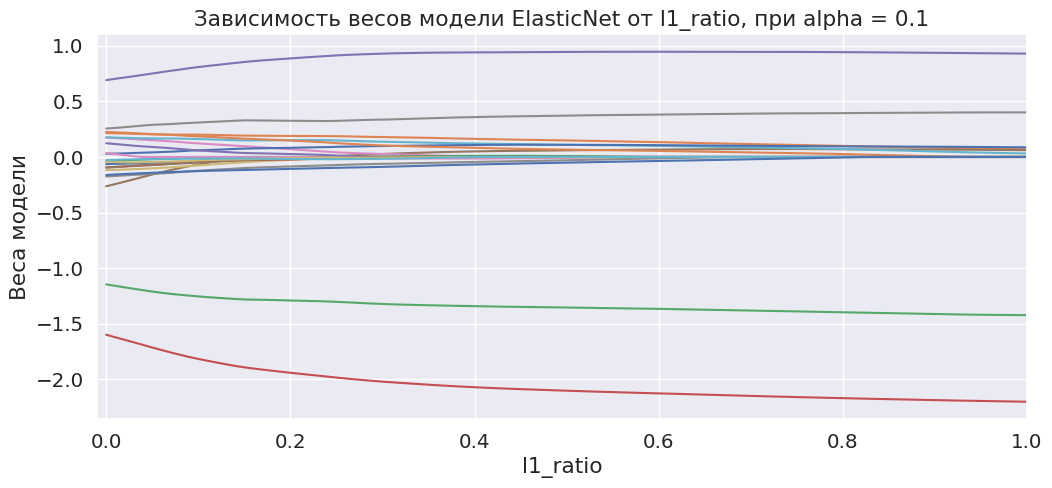

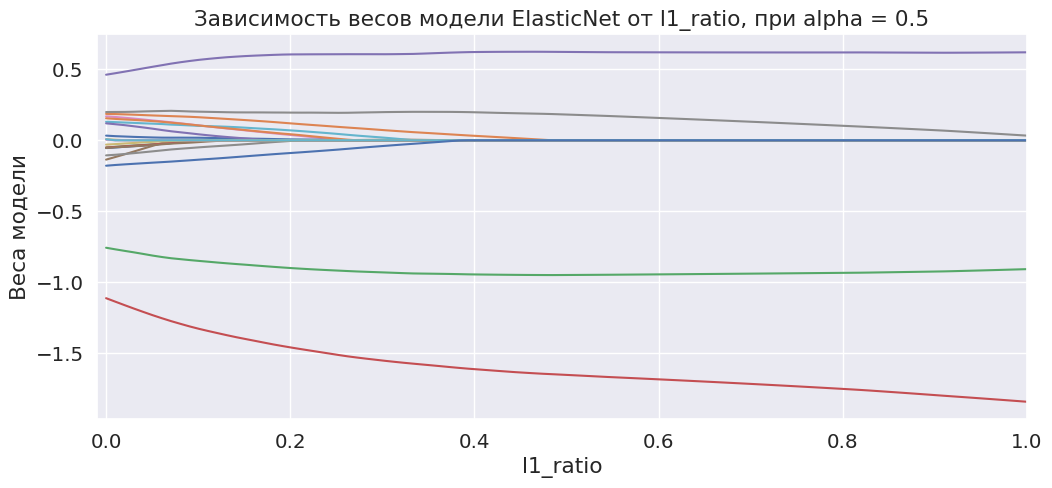

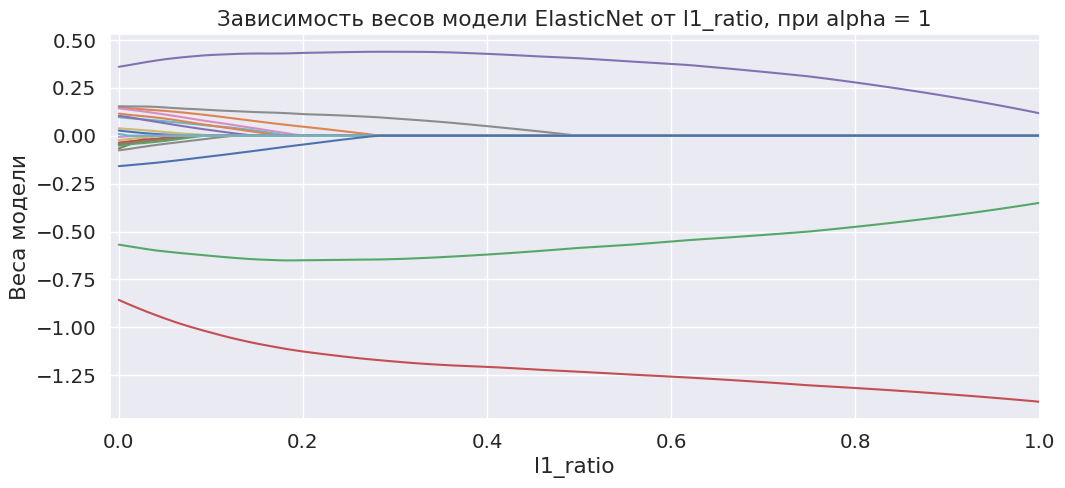

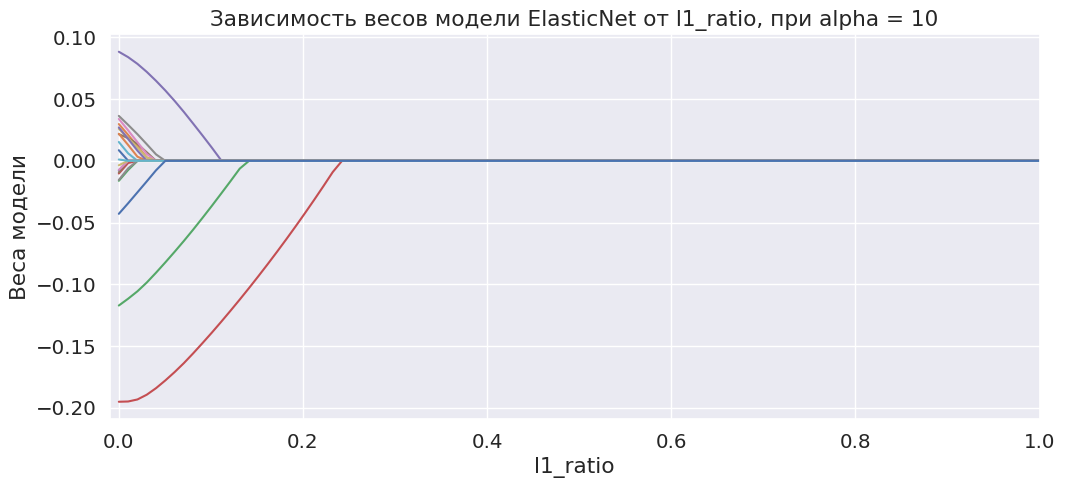

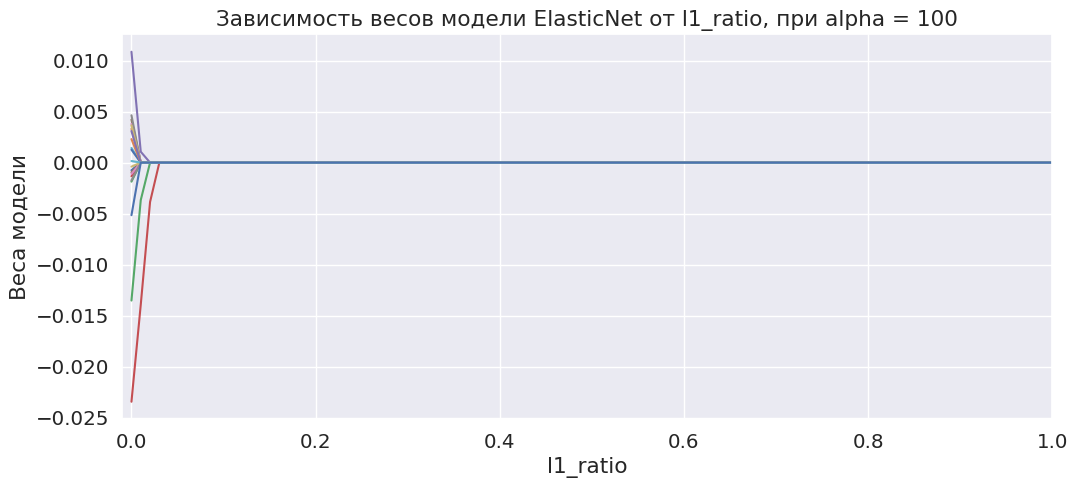

In [ ]:
alphas = [0.1, 0.5, 1, 10, 100]

for alpha in alphas:
    weights = []
    l1_ratio_values = np.linspace(0, 1, 100)
    for l1 in l1_ratio_values:
        weights.append(ElasticNet(alpha = alpha, l1_ratio = l1).fit(X_train, y_train).coef_[:21])

    weights = np.array(weights)

    plt.figure(figsize = (12, 5),)

    for i, weight in enumerate(weights.T):
        plot = plt.plot(l1_ratio_values, weight)
    plt.xlabel("l1_ratio")
    plt.ylabel("Веса модели")
    plt.xlim(-0.01, 1)
    plt.title(f"Зависимость весов модели ElasticNet от l1_ratio, при alpha = {alpha}");

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

**Вывод:** На всех графиках видно, что при l_ratio [0.8, 1] веса ограничиваются хорошо



**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [ ]:
linreg = {}
linreg['MSE'] = mean_squared_error(y_test, LinearRegression().fit(X_train, y_train).predict(X_test))
linreg['MAE'] = mean_absolute_error(y_test, LinearRegression().fit(X_train, y_train).predict(X_test))
linreg['MAPE'] = mean_absolute_percentage_error(y_test, LinearRegression().fit(X_train, y_train).predict(X_test))

Реализуйте функцию для отрисовки изменения величины ошибки от параметра регуляризации.

In [ ]:
def draw_errors(error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей

    error - функция, вычисляющая ошибку
    error_name - имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    alphas - массив величин alpha

    """
    l1_ratios = [0.3, 0.6, 0.9]
    lassoError = []
    ridgeError = []
    elastic = {l1_ratio: [] for l1_ratio in l1_ratios}

    for alpha in alphas:
        lassoError.append(error(Lasso(alpha = alpha).fit(X_train, y_train).predict(X_test), y_test))
        ridgeError.append(error(Ridge(alpha = alpha).fit(X_train, y_train).predict(X_test), y_test))
        for l1_ratio in elastic.keys():
            elastic[l1_ratio].append(error(ElasticNet(alpha = alpha, l1_ratio = l1_ratio).fit(X_train, y_train).predict(X_test), y_test))
    plt.figure(figsize = (20, 5))
    plt.plot(alphas, lassoError, label = 'Lasso')
    plt.plot(alphas, ridgeError, label = 'Ridge')
    for l1_ratio in elastic.keys():
        plt.plot(alphas, elastic[l1_ratio], label = f'Elastic {l1_ratio}')
    plt.title(f"Зависимость ошибки {error_name} от параметра регуляризации")
    plt.xlabel(r"$\alpha$")
    plt.legend()
    plt.xscale('log')
    plt.ylabel(f"${error_name}$")




Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [ ]:
alphas = np.logspace(-2, 8, 20)

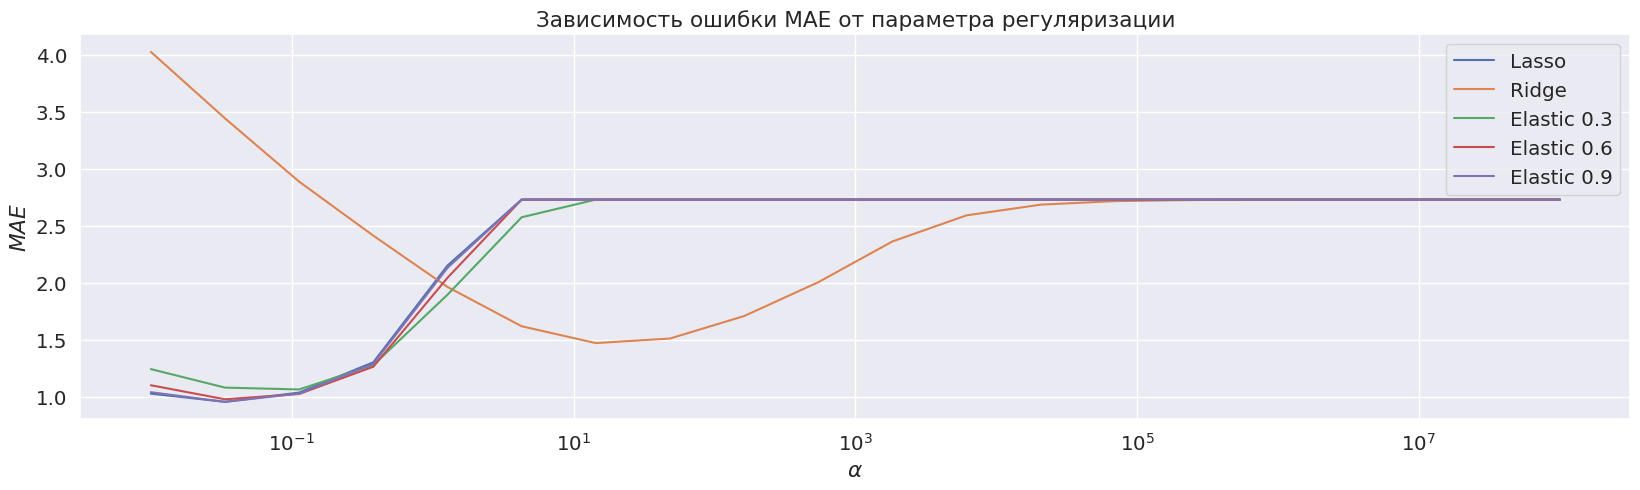

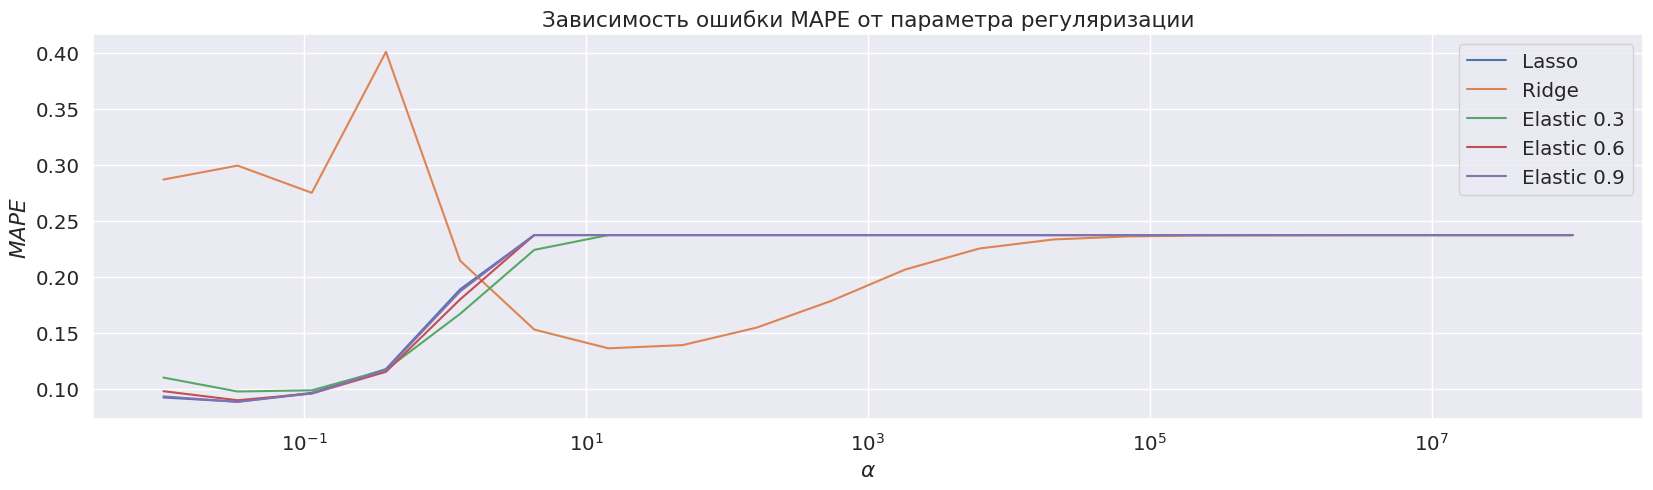

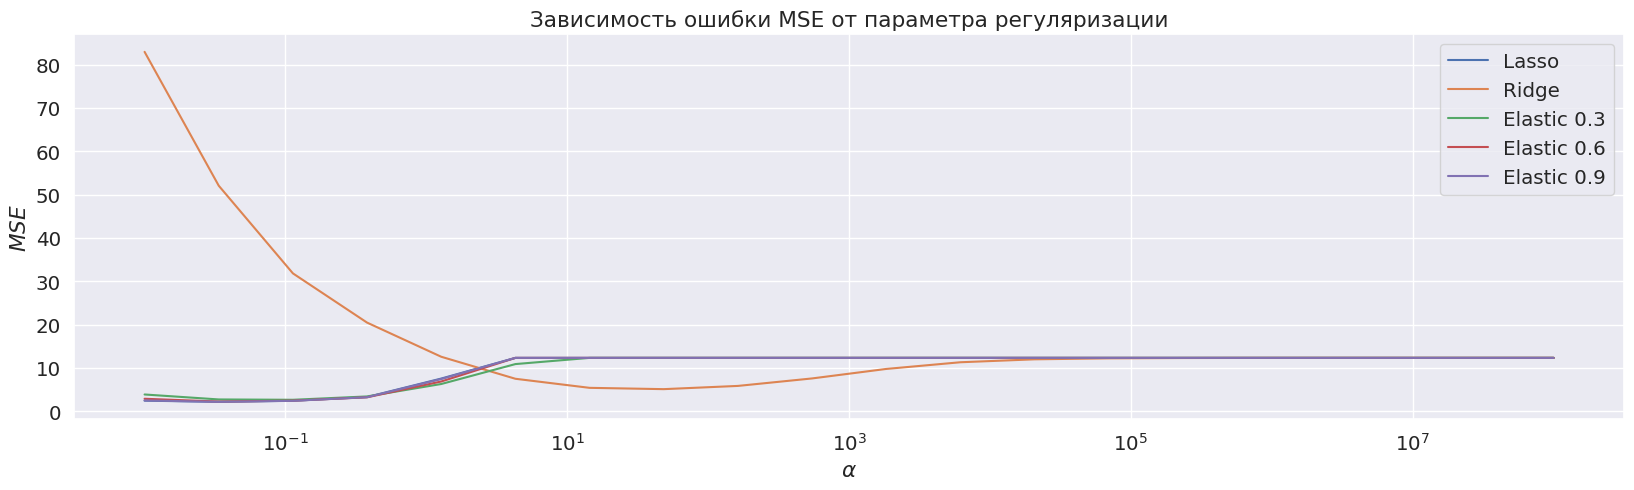

In [ ]:
errors = [mean_absolute_error, mean_absolute_percentage_error, mean_squared_error]
errorName = ['MAE', 'MAPE', 'MSE']

for i in range(3):
  draw_errors(errors[i],errorName[i],alphas)



**3.** Сделайте общий вывод по задаче.

**Вывод:** В данной задаче рассмотрели разные подборки параметров для минимизации ошибок. Увидели, что можно найти всегда диапазон альфа, при котором Lasso, Ridge, ElasticNet работают лучше линейной регрессии


### Задача 4
Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид: $$\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$$ Найдите решение задачи в матричном виде.
